# Рынок заведений общественного питания Москвы

**Описание проекта**  

Заказчики исследования решили открыть заведение общественного питания в Москве. Они ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

**Цель проекта**  

Подготовить исследование рынка Москвы и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

**Описание данных**

Вам доступен датасет `moscow_places.csv` с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

**Ход исследования**  
Исследование пройдёт в несколько этапов:
- Загрузка данных и изучение общей информации
- Предобработка данных
- Анализ данных
- Детализация исследования: открытие кофейни
- Общий вывод

## Загрузите данные и изучите общую информацию

In [138]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [139]:
pd.set_option('display.max_columns', None) # код для того, чтобы отображались все сттолбцы датафрейма при выводе их на экран
pd.set_option('max_colwidth', 200) # код для того, чтобы столбцы отображались полностью

In [140]:
data = pd.read_csv('/datasets/moscow_places.csv')

data.head() # отобразим первые 5 строк датафрейма data

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [141]:
f'Датарейм data состоит из {data.shape[0]} строк, то есть заведений и {data.shape[1]} столбцов.'

'Датарейм data состоит из 8406 строк, то есть заведений и 14 столбцов.'

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Видим, что пропуски есть в следующих столбцах: 'hours', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup' и 'seats'.

Значения типа 'object' хранят в себе следующие столбцы: 'name', 'category', 'address', 'district', 'hours', 'price', 'avg_bill'.  
Значения типа 'float64' хранят в себе следующие столбцы: 'lat', 'lng', 'rating', 'middle_avg_bill', 'middle_coffee_cup','seats'.  
Значения типа 'chain' хранят в себе следующие столбцы: 'chain'.  

### Вывод к шагу 1

Сохранили данные о заведениях в датафрейм data. Датафрейм состоит из 8406 строк и 14 столбцов.  

## Выполните предобработку данных

### Изучите, есть ли дубликаты в данных

In [143]:
data.duplicated().sum()

0

Видим, что явных дубликатов нет.

Проверим данные на неявные дубликаты. Отобразим дубликаты одновременно по столбцам 'name' и 'adress'.

In [144]:
data.duplicated(subset=['name','address']).sum()

0

Видим, что явных дубликатов по столбцам 'name' и 'address' нет.

### Обработка пропусков

На первом шаге выяснили, что пропуски есть в следующих столбцах: 'hours', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup' и 'seats'.

**Рассмотрим столбец 'hours'**

In [145]:
data['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

В столбце 'hours' отображается информация о днях и часах работы. Это категориальная переменная. Пропущенные значения заменим заглушкой 'unknown'.

In [146]:
data['hours'] = data['hours'].fillna('unknown')

In [147]:
# Проверим, поостались ли пропуски в столбце 'hours'
data['hours'].isna().sum()

0

**Рассмотрим столбец 'price'**

In [148]:
data['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

В столбце 'price' отображается категория цен в заведении. Это категориальная переменная. Пропущенные значения заменим заглушкой 'unknown'.

In [149]:
data['price'] = data['price'].fillna('unknown')

In [150]:
# Проверим, поостались ли пропуски в столбце 'hours'
data['price'].isna().sum()

0

**Рассмотрим столбец 'avg_bill'**

In [151]:
data['avg_bill'].head(10)

0                              NaN
1         Средний счёт:1500–1600 ₽
2           Средний счёт:от 1000 ₽
3    Цена чашки капучино:155–185 ₽
4           Средний счёт:400–600 ₽
5                              NaN
6               Средний счёт:199 ₽
7           Средний счёт:200–300 ₽
8            Средний счёт:от 500 ₽
9         Средний счёт:1000–1200 ₽
Name: avg_bill, dtype: object

В столбце 'price' отображается категория цен в заведении. Это категориальная переменная. Пропущенные значения заменим заглушкой 'unknown'.

In [152]:
data['avg_bill'] = data['avg_bill'].fillna('unknown')

In [153]:
# Проверим, поостались ли пропуски в столбце 'hours'
data['avg_bill'].isna().sum()

0

**Рассмотрим столбец 'middle_avg_bill'**

In [154]:
data['middle_avg_bill'].head(10)

0       NaN
1    1550.0
2    1000.0
3       NaN
4     500.0
5       NaN
6     199.0
7     250.0
8     500.0
9    1100.0
Name: middle_avg_bill, dtype: float64

В столбце 'middle_avg_bill' отображается число с оценкой среднего чека, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Средний счёт». Это количественная переменная. Оставим столбец 'middle_avg_bill'] без заполнения пропусков.

**Рассмотрим столбец 'middle_coffee_cup'**

In [155]:
data['middle_coffee_cup'].head()

0      NaN
1      NaN
2      NaN
3    170.0
4      NaN
Name: middle_coffee_cup, dtype: float64

В столбце 'middle_coffee_cup' отображается число с оценкой одной чашки капучино, которое указано только для значений из столбца 'avg_bill', начинающихся с подстроки «Цена одной чашки капучино». Это количественная переменная. Оставим столбец 'middle_coffee_cup' без заполнения пропусков.

**Рассмотрим стобец 'seats'**

In [156]:
data['seats'].head()

0      NaN
1      4.0
2     45.0
3      NaN
4    148.0
Name: seats, dtype: float64

В столбце 'seats' отображается количество посадочных мест. Это количественная переменная. Оставим столбец 'seats' без заполнения пропусков.

### Удаление неявных дубликатов из столбца 'name'

In [157]:
data['name'] = (
    data['name']
    .str.replace('_', ' ')
    .str.replace('-', ' ')
    .str.replace('.', ' ')
    .str.replace('/', ' ')
    .str.replace('&', '')
)

<ipython-input-157-d01b00ea4ec1>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



### Создайте столбец `street` с названиями улиц из столбца с адресом.

In [158]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,unknown,unknown,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,unknown,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [159]:
data['street'] = data['address'].str.split(', ').apply(lambda x: x[1])

In [160]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,unknown,unknown,NaN,NaN,0,NaN,улица Дыбенко
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица Дыбенко
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,Клязьминская улица
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,unknown,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,Правобережная улица


### Создайте столбец `is_24/7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7):  
    - логическое значение True — если заведение работает ежедневно и круглосуточно;
    - логическое значение False — в противоположном случае.

In [161]:
data['is_24/7'] = data['hours'].isin(['ежедневно, круглосуточно'])

In [162]:
# сделаем срез данных, чтобы удедиться, что верно отображаются строки со значением True в столбце 'is_24/7'
data[data['is_24/7']==True]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
10,Great Room Bar,"бар,паб","Москва, Левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",55.877832,37.469171,4.5,средние,Цена бокала пива:250–350 ₽,NaN,NaN,0,102.0,Левобережная улица,True
17,Чайхана Беш Бармак,ресторан,"Москва, Ленинградское шоссе, 71Б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",55.876908,37.449876,4.4,средние,Средний счёт:350–500 ₽,425.0,NaN,0,96.0,Ленинградское шоссе,True
19,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",55.887969,37.515688,4.4,unknown,unknown,NaN,NaN,1,NaN,Ижорский проезд,True
24,Drive Café,кафе,"Москва, улица Дыбенко, 9Ас1",Северный административный округ,"ежедневно, круглосуточно",55.879992,37.481571,4.0,unknown,unknown,NaN,NaN,1,NaN,улица Дыбенко,True
49,2U Ту Ю,пиццерия,"Москва, Ижорская улица, 8А",Северный административный округ,"ежедневно, круглосуточно",55.886160,37.508784,2.7,unknown,Средний счёт:900 ₽,900.0,NaN,0,NaN,Ижорская улица,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Намангале,кафе,"Москва, Ферганская улица, вл17-21",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.705332,37.819244,4.3,unknown,unknown,NaN,NaN,0,NaN,Ферганская улица,True
8399,"Пекарня, кафе гриль",булочная,"Москва, Болотниковская улица, 52, корп. 2",Юго-Западный административный округ,"ежедневно, круглосуточно",55.662866,37.582572,4.2,unknown,Средний счёт:50–250 ₽,150.0,NaN,0,50.0,Болотниковская улица,True
8403,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,unknown,Средний счёт:от 150 ₽,150.0,NaN,0,150.0,Люблинская улица,True
8404,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,unknown,unknown,NaN,NaN,1,150.0,Люблинская улица,True


### Вывод к шагу 2  
- Выяснили, что явных дубликатов в датафрейме нет. Явных дубликатов одновременно по столбцам 'name' и 'address' также нет.
- В столбцах с категориальными значениями ('hours', 'price', 'avg_bill') заменили пропуски на значение-заглушку 'unknown'. Пропуски в столбцах с количественными значениями не заполняли.  
- Удалили неявные дубликаты из столбца 'name'.  
- Создали столбец 'street' с названиями улиц из столбца с адресом и столбец 'is_24/7' с обозначением, что заведение работает ежедневно и круглосуточно.

## Анализ данных

### Какие категории заведений представлены в данных?
**Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.**

In [163]:
category_data = (data.
                 groupby('category').agg({'name': 'count'})
                 .rename(columns={'name':'count_of_catering_establishments'})
                 .sort_values(by='count_of_catering_establishments',ascending=False)
                 .reset_index()
                )
category_data

,category,count_of_catering_establishments
0,кафе,2378
1,ресторан,2043
2,кофейня,1413
3,"бар,паб",765
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


In [164]:
# строим столбчатую диаграмму
fig = px.bar(category_data.sort_values(by='count_of_catering_establishments', ascending=True), # загружаем данные и заново их
             # сортируем
             x='count_of_catering_establishments', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text='count_of_catering_establishments' # добавляем аргумент, который отобразит текст с информацией
                          # о медианном количестве мест в категории заведения
            )
# оформляем график
fig.update_layout(
    title='Категории заведений, представленные в данных',
    xaxis_title='Количество заведений',
    yaxis_title='Категории заведений'
)
fig.show() # выводим график

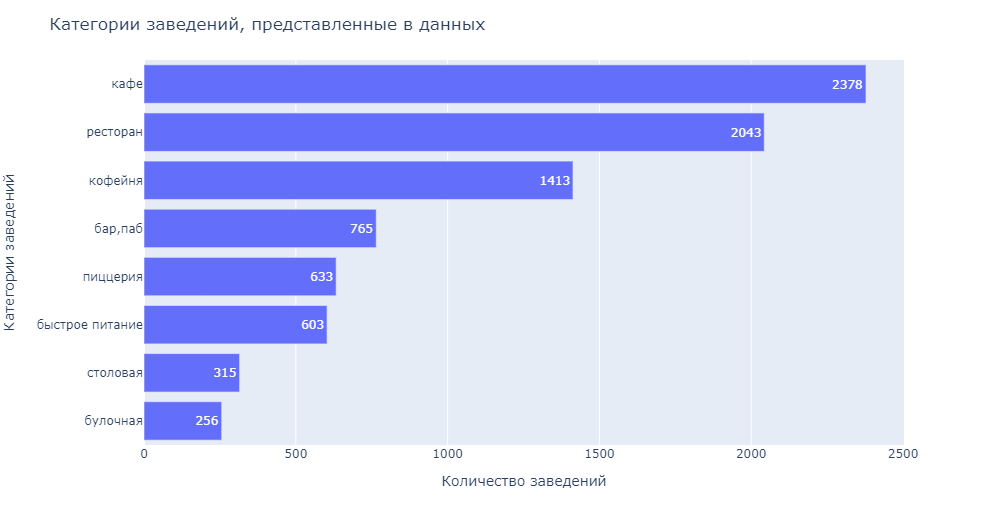

По диаграмме можем сделать вывод, что три самых популярных категории заведений общественного питания в Москве - это кафе, ресторан и кофейня.

### Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.

Сравним число посадочных мест по категориям при помощи медианного значения для каждой категории заведений.

In [165]:
seats_by_category = data.groupby('category').agg({'seats':'median'}).reset_index()
seats_by_category

,category,seats
0,"бар,паб",82.5
1,булочная,50.0
2,быстрое питание,65.0
3,кафе,60.0
4,кофейня,80.0
5,пиццерия,55.0
6,ресторан,86.0
7,столовая,75.5


In [166]:
# строим столбчатую диаграмму
fig = px.bar(seats_by_category.sort_values(by='seats', ascending=True), # загружаем данные и заново их сортируем
             x='seats', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text='seats' # добавляем аргумент, который отобразит текст с информацией
                          # о медианном количестве мест в категории заведения
            )
# оформляем график
fig.update_layout(title='Медианное количество посадочных мест по категориям заведений',
                   xaxis_title='Медианное количество мест',
                   yaxis_title='Категории заведений')
fig.show() # выводим график

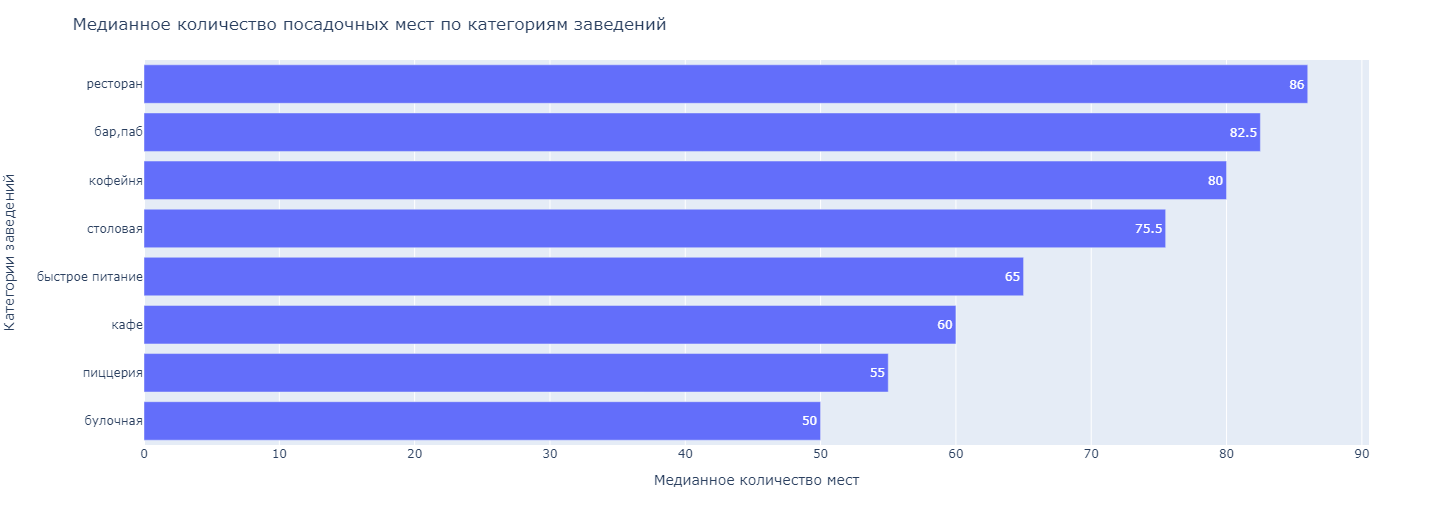

По столбчатой диаграмме видно, что категории заведений с самым большим количеством мест:  
1. рестораны;
2. бары(пабы);
3. кофейни.

### Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [167]:
chain_count = data.groupby('chain').agg({'chain':'count'}).rename(
    index={0: 'не сеть', 1:'сеть'},
    columns={'chain':'count'}
).reset_index()
chain_count

,chain,count
0,не сеть,5201
1,сеть,3205


In [168]:
fig = go.Figure(
    data=[go.Pie(
        labels=chain_count['chain'],
        values=chain_count['count'],
        title = 'Соотношение сетевых и несетевых заведений в датасете'
    )]
)

fig.show()

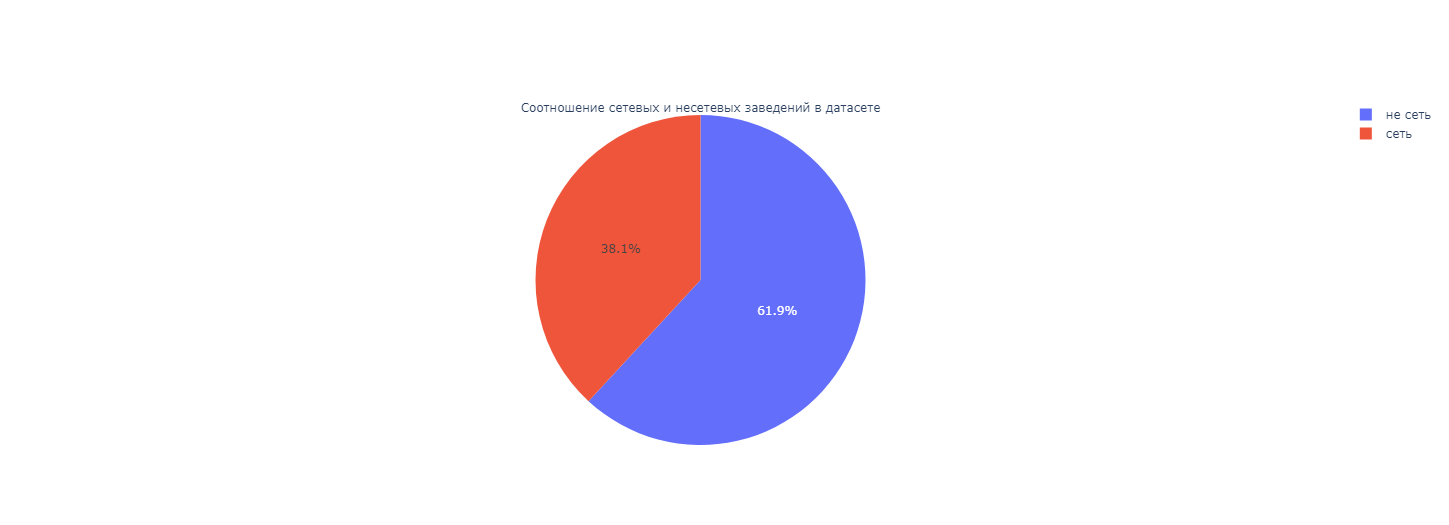

По диаграмме можем сделать вывод, что несетевых заведений больше.

### Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

In [169]:
data_for_chain = (data[data['chain']==1]
                  .groupby('category')
                  .agg({'category':'count'})
                  .rename(columns={'category':'count_of_chain_catering_establishments'})
                  .sort_values(by='count_of_chain_catering_establishments', ascending=False)
                  .reset_index()
                 )
data_for_chain

,category,count_of_chain_catering_establishments
0,кафе,779
1,ресторан,730
2,кофейня,720
3,пиццерия,330
4,быстрое питание,232
5,"бар,паб",169
6,булочная,157
7,столовая,88


In [170]:
# создадим таблицу,где будет отображена доля сетевых заведений в общем количестве заведений по категориям
share_of_chain_catering_establishments = data_for_chain.merge(category_data, on='category')

share_of_chain_catering_establishments['share_of_chain_catering_establishments,%'] = (
    round(
        share_of_chain_catering_establishments['count_of_chain_catering_establishments']/
        share_of_chain_catering_establishments['count_of_catering_establishments'] * 100,
        2)
)

share_of_chain_catering_establishments = (
    share_of_chain_catering_establishments
    .sort_values(by='share_of_chain_catering_establishments,%', ascending=False)
    .reset_index(drop=True)
)
share_of_chain_catering_establishments

,category,count_of_chain_catering_establishments,count_of_catering_establishments,"share_of_chain_catering_establishments,%"
0,булочная,157,256,61.33
1,пиццерия,330,633,52.13
2,кофейня,720,1413,50.96
3,быстрое питание,232,603,38.47
4,ресторан,730,2043,35.73
5,кафе,779,2378,32.76
6,столовая,88,315,27.94
7,"бар,паб",169,765,22.09


In [171]:
# строим столбчатую диаграмму
fig = px.bar(share_of_chain_catering_establishments.sort_values(by='share_of_chain_catering_establishments,%',
                                                                ascending=True), # загружаем данные и заново их сортируем
             x='share_of_chain_catering_establishments,%', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text="share_of_chain_catering_establishments,%" # добавляем аргумент, который отобразит текст с информацией
                          # о медианном количестве мест в категории заведения
            )
# оформляем график
fig.update_layout(title='Доля сетевых заведений к общему числу заведений данной категории',
                   xaxis_title='Доля сетевых заведений к общему числу заведений в данной категории',
                   yaxis_title='Категории заведений')
fig.show() # выводим график

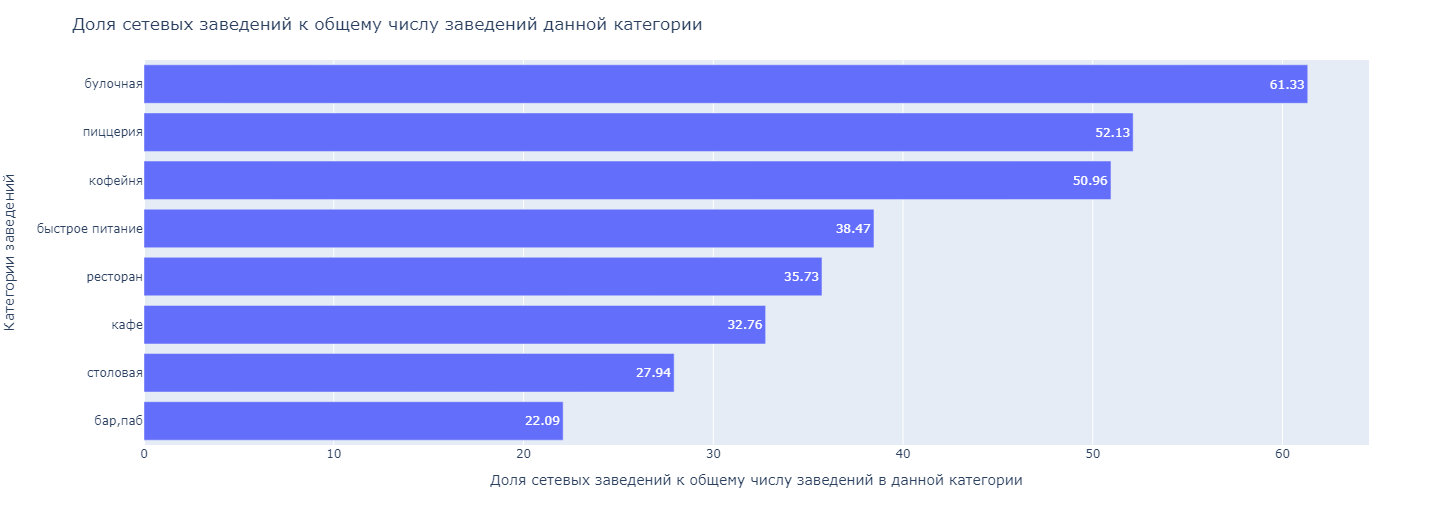

Чаще всего сетевыми являются булочные, доля сетевых заведений булочных к общему числу булочных, составляет 61.33%.

### Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве.
**Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?**

Выведем топ-15 самых популярных названий заведений в Москве.

In [172]:
count_name = (
    data
    .groupby('name').agg({'name':'count'})
    .rename(columns={'name':'count'})
    .sort_values(by='count', ascending=False)
    .reset_index()
    .head(15)
)
count_name

,name,count
0,Кафе,189
1,Шоколадница,120
2,Домино'с Пицца,76
3,Додо Пицца,74
4,Яндекс Лавка,72
5,One Price Coffee,71
6,Cofix,65
7,Prime,50
8,Хинкальная,44
9,Шаурма,43


Видим, что в названиях самых популярных заведений встречаются такие названия, как "Кафе", "Ресторан". Данные заведения относятся к несетевым.   
А теперь выведем топ-15 самых популярных названий сетей.

In [173]:
count_name_chain = (
    data[data['chain']==1]
    .groupby(['name']).agg({'name':'count', 'category':pd.Series.mode}) # группируем по имени и категории заведений, так как
    # встречаются разные категории заведений с одинаковым названием
    .rename(columns={'name':'count'})
    .sort_values(by='count', ascending=False)
    .reset_index()
    .head(15)
)
display(count_name_chain)

,name,count,category
0,Шоколадница,120,кофейня
1,Домино'с Пицца,76,пиццерия
2,Додо Пицца,74,пиццерия
3,Яндекс Лавка,72,ресторан
4,One Price Coffee,71,кофейня
5,Cofix,65,кофейня
6,Prime,50,ресторан
7,Хинкальная,44,кафе
8,КОФЕПОРТ,42,кофейня
9,Кулинарная лавка братьев Караваевых,39,кафе


In [174]:
# строим столбчатую диаграмму
fig = px.bar(count_name_chain.sort_values(by='count', ascending=True), # загружаем данные и заново их сортируем
             x='count', # указываем столбец с данными для оси X
             y='name', # указываем столбец с данными для оси Y
             text='count' # добавляем аргумент, который отобразит текст с информацией
                          # о медианном количестве мест в категории заведения
            )
# оформляем график
fig.update_layout(
    title='Топ-15 названий самых популярных сетевых заведений в Москве',
    xaxis_title='Количество заведений',
    yaxis_title='Сетевые заведения'
                 )
fig.show() # выводим график

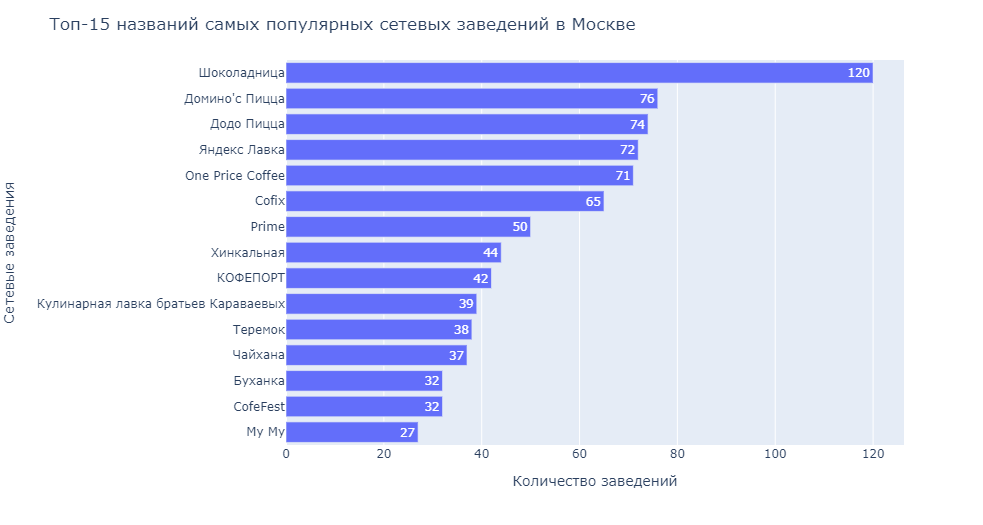

Видим, что "Шоколадница" является самым популярным сетевым заведением в Москве.

Выясним категории заведений, которые чаще всего встречаются среди топ-15 самых популярных сетевых заведений.

In [175]:
most_popular_category_from_top15 = (
    count_name_chain
    .groupby('category')
    .agg({'name':'count'})
    .rename(columns={'name':'count'})
    .sort_values(by='count',ascending=False)
    .reset_index()
)
most_popular_category_from_top15

,category,count
0,кофейня,5
1,кафе,4
2,ресторан,3
3,пиццерия,2
4,булочная,1


In [176]:
# строим столбчатую диаграмму
fig = px.bar(most_popular_category_from_top15.sort_values(by='count', ascending=True), # загружаем данные и заново их сортируем
             x='count', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text='count' # добавляем аргумент, который отобразит текст с информацией
                          # о медианном количестве мест в категории заведения
            )
# оформляем график
fig.update_layout(title=f'Категории заведений, чаще всего встречающиеся среди топ-15 самых популярных сетевых заведений',
                   xaxis_title='Число категорий',
                   yaxis_title='Категории заведений')
fig.show() # выводим график

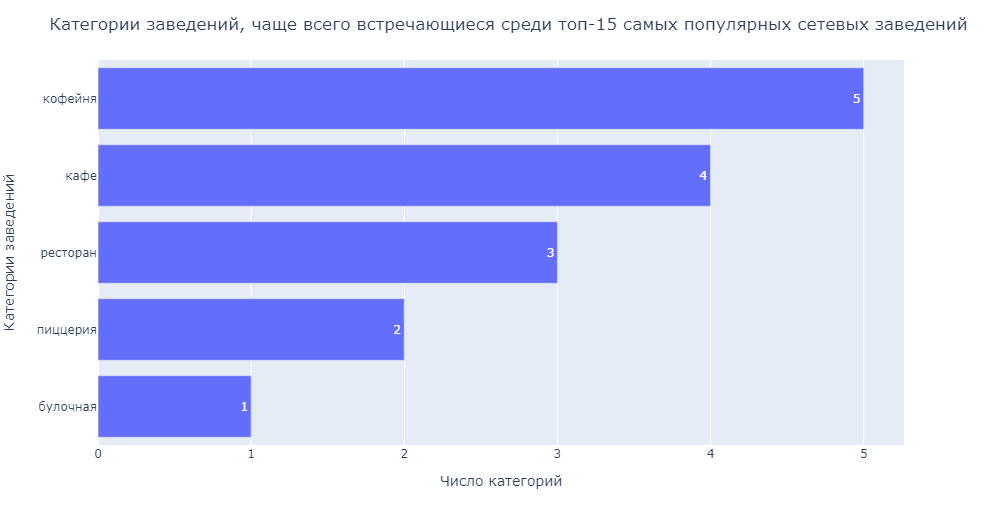

Кофейни чаще всего встречаются среди топ-15 самых популярных сетевых заведений.

### Какие административные районы Москвы присутствуют в датасете?
**Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.**

In [177]:
# Общее количество заведений по районам
district_name= (
    data.pivot_table(index='district',values='name',aggfunc='count')
    .rename(columns={'name':'total'})
    .sort_values(by='total',ascending=False)
    .reset_index()
)
district_name

,district,total
0,Центральный административный округ,2242
1,Северный административный округ,900
2,Южный административный округ,892
3,Северо-Восточный административный округ,891
4,Западный административный округ,851
5,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
8,Северо-Западный административный округ,409


In [178]:
data_groupby_district_and_category = data.groupby(['district','category'],as_index=False).agg({'name':'count'})
data_groupby_district_and_category.head()

,district,category,name
0,Восточный административный округ,"бар,паб",53
1,Восточный административный округ,булочная,25
2,Восточный административный округ,быстрое питание,71
3,Восточный административный округ,кафе,272
4,Восточный административный округ,кофейня,105


In [179]:
merge_and_sorted_data_groupby_district_and_category = (
    data_groupby_district_and_category.
    merge(district_name, on='district')
    .sort_values(by='total', ascending=False)
)
merge_and_sorted_data_groupby_district_and_category.head()

,district,category,name,total
41,Центральный административный округ,булочная,50,2242
42,Центральный административный округ,быстрое питание,87,2242
43,Центральный административный округ,кафе,464,2242
44,Центральный административный округ,кофейня,428,2242
45,Центральный административный округ,пиццерия,113,2242


In [180]:
fig = px.bar(merge_and_sorted_data_groupby_district_and_category,
             x='district',
             y='name',
             color='category',
             title='Количество заведений каждой категории по районам',
            )
fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis_title='Административный округ',
                   yaxis_title='Количество заведений')
fig.show()

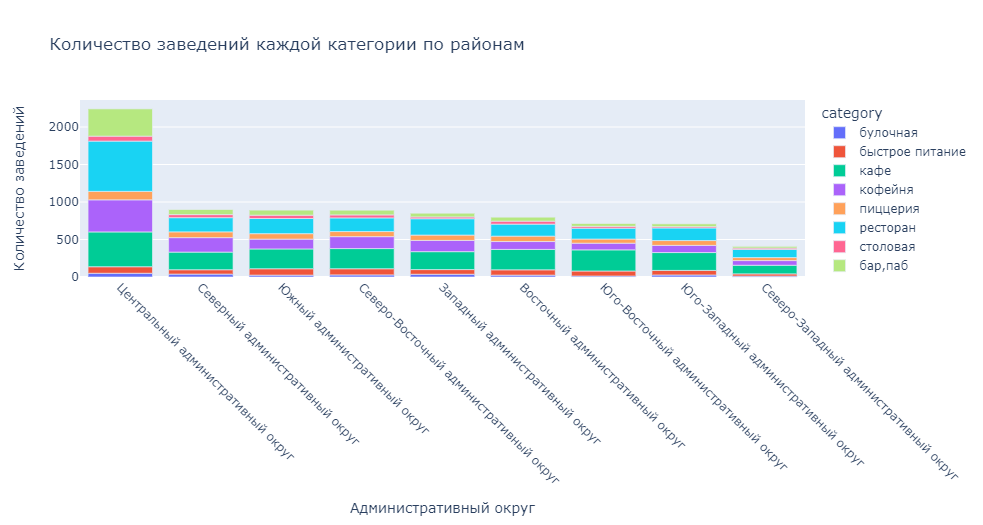

Наибольшее количество заведений расположено в Центральном административном округе Москвы. Наименьшее количество заведений - в Северо-Западном административном округе.

### Визуализируйте распределение средних рейтингов по категориям заведений.
**Сильно ли различаются усреднённые рейтинги в разных типах общепита?**

In [181]:
data_groupby_category_and_rating = (
    data
    .groupby('category',as_index=False)
    .agg({'rating':'mean'})
    .round(2)
    .sort_values(by='rating',ascending=False)
)
data_groupby_category_and_rating

,category,rating
0,"бар,паб",4.39
5,пиццерия,4.30
6,ресторан,4.29
4,кофейня,4.28
1,булочная,4.27
7,столовая,4.21
3,кафе,4.12
2,быстрое питание,4.05


In [182]:
# строим столбчатую диаграмму
fig = px.bar(data_groupby_category_and_rating.sort_values(by='rating', ascending=True), # загружаем данные и заново их сортируем
             x='rating', # указываем столбец с данными для оси X
             y='category', # указываем столбец с данными для оси Y
             text='rating' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Средняя оценка по категориям заведений',
                   xaxis_title='Средняя оценка',
                   yaxis_title='Категория заведений')

fig.show() # выводим график

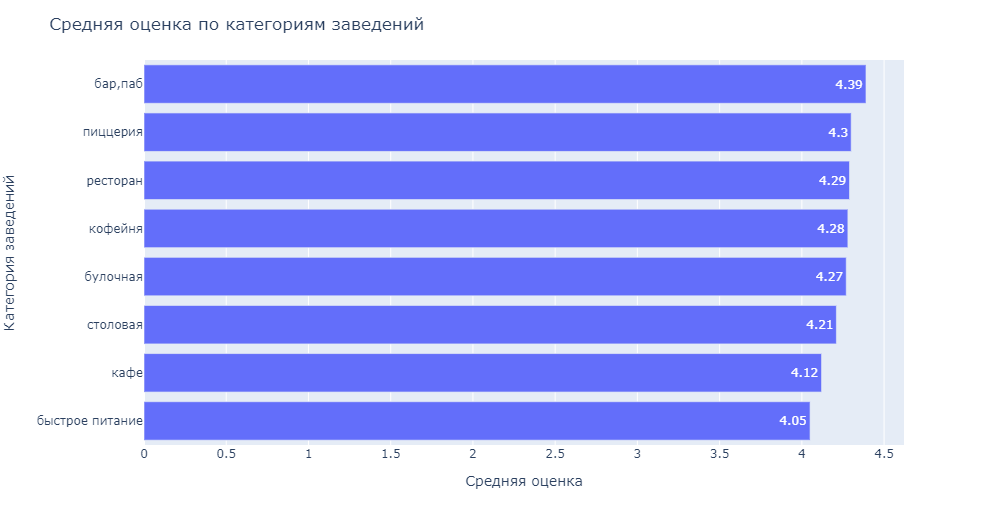

Наивысшую оценку имеет категория заведений - "бар, паб", наименьшую оценку - категория "быстрое питание".

### Отобразите средний рейтинг заведений для каждого района.

In [183]:
rating_df = (
    data
    .groupby('district',as_index=False)
    .agg({'rating':'mean'})
    .round(2)
    .sort_values(by='rating',ascending=False)
)
rating_df

,district,rating
5,Центральный административный округ,4.38
2,Северный административный округ,4.24
4,Северо-Западный административный округ,4.21
1,Западный административный округ,4.18
8,Южный административный округ,4.18
0,Восточный административный округ,4.17
7,Юго-Западный административный округ,4.17
3,Северо-Восточный административный округ,4.15
6,Юго-Восточный административный округ,4.10


In [184]:
# строим столбчатую диаграмму
fig = px.bar(rating_df.sort_values(by='rating', ascending=True), # загружаем данные и заново их сортируем
             x='rating', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='rating' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Средняя оценка заведений по административным округам Москвы',
                   xaxis_title='Средняя оценка',
                   yaxis_title='Административный округ Москвы')

fig.show() # выводим график

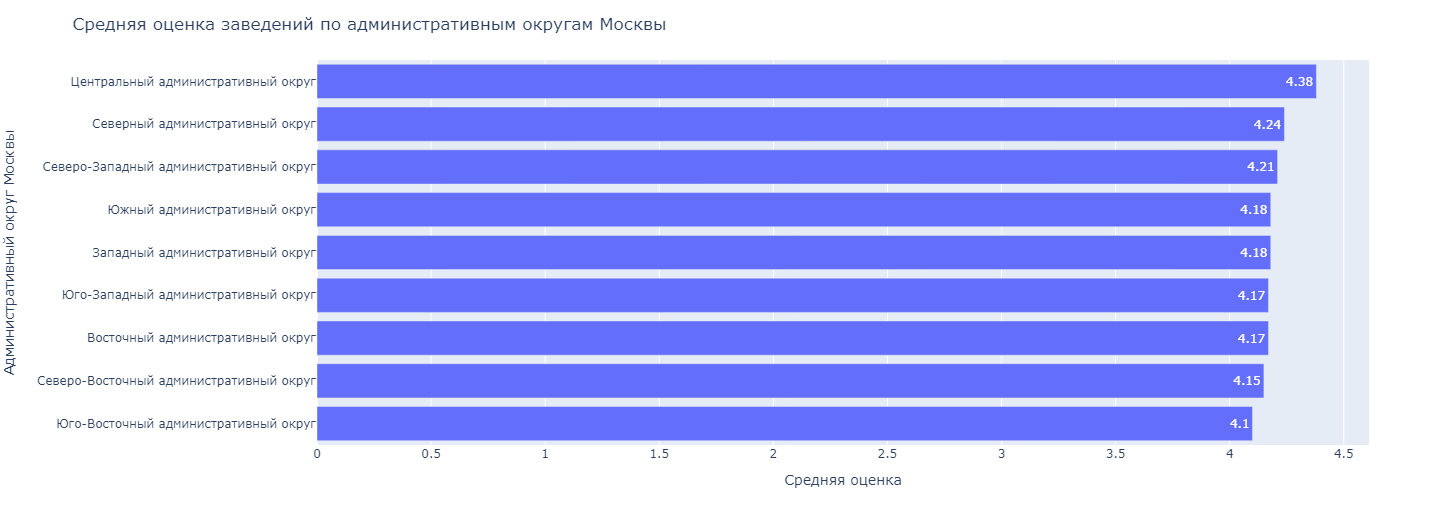

Самый высокий рейтинг у заведений общественного питания в Центральном административном округе (4.38). Самый низкий - в Юго-Восточном административном округе (4.10).

### Найдите топ-15 улиц по количеству заведений.
**Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.**

In [185]:
# Отобразим топ-15 улиц по количеству заведений
top15_street = (
    data
    .groupby('street').agg({'name':'count'})
    .sort_values(by='name',ascending=False)
    .reset_index().
    head(15)
)
top15_street

,street,name
0,проспект Мира,184
1,Профсоюзная улица,122
2,проспект Вернадского,108
3,Ленинский проспект,107
4,Ленинградский проспект,95
5,Дмитровское шоссе,88
6,Каширское шоссе,77
7,Варшавское шоссе,76
8,Ленинградское шоссе,70
9,МКАД,65


In [186]:
# Добавим остальные данные о заведениях к топ-15 улиц по количеству заведений
data_with_top15_street = top15_street.merge(data,on='street')
data_with_top15_street.head()

,street,name_x,name_y,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7
0,проспект Мира,184,Все Лень,ресторан,"Москва, проспект Мира, 119, стр. 528",Северо-Восточный административный округ,"пн-чт 12:00–21:00; пт,сб 12:00–22:00; вс 12:00–21:00",55.836107,37.614875,4.4,выше среднего,Средний счёт:от 1500 ₽,1500.0,NaN,0,NaN,False
1,проспект Мира,184,Старое место,кафе,"Москва, проспект Мира, 119, стр. 504",Северо-Восточный административный округ,"ежедневно, 11:00–22:00",55.837212,37.616469,4.1,средние,Средний счёт:900–1100 ₽,1000.0,NaN,0,NaN,False
2,проспект Мира,184,Doner One,кафе,"Москва, проспект Мира, 119, стр. 596",Северо-Восточный административный округ,"ежедневно, 11:00–21:00",55.839037,37.613027,4.2,unknown,unknown,NaN,NaN,0,NaN,False
3,проспект Мира,184,Пян се,быстрое питание,"Москва, проспект Мира, 119, стр. 27",Северо-Восточный административный округ,"ежедневно, 10:00–20:00",55.834563,37.613549,4.4,unknown,unknown,NaN,NaN,1,NaN,False
4,проспект Мира,184,Космос,кафе,"Москва, проспект Мира, 119, стр. 34",Северо-Восточный административный округ,вт-вс 10:45–21:00,55.835060,37.622033,3.8,unknown,unknown,NaN,NaN,0,NaN,False


In [187]:
# Сгруппируем данные по улице и категории заведения для построения диаграммы
data_groupby_with_top15_street = (
    data_with_top15_street
    .groupby(['street','category'],as_index=False)
    .agg({'name_y':'count'})
)
# отобразим первые 5 строк
data_groupby_with_top15_street.head()

,street,category,name_y
0,Варшавское шоссе,"бар,паб",6
1,Варшавское шоссе,быстрое питание,7
2,Варшавское шоссе,кафе,18
3,Варшавское шоссе,кофейня,14
4,Варшавское шоссе,пиццерия,4


In [188]:
merge_and_sorted_data_groupby_with_top15_street = (
    data_groupby_with_top15_street
    .merge(top15_street, on='street')
    .sort_values(by='name',ascending=False)
)
merge_and_sorted_data_groupby_with_top15_street.head()

,street,category,name_y,name
92,проспект Мира,быстрое питание,21,184
97,проспект Мира,столовая,2,184
95,проспект Мира,пиццерия,11,184
94,проспект Мира,кофейня,36,184
93,проспект Мира,кафе,53,184


In [189]:
fig = px.bar(merge_and_sorted_data_groupby_with_top15_street.sort_values(by='name',ascending=True),
             x='name_y',
             y='street',
             color='category',
             title='Диаграмма распределения количества заведений и их категорий для топ-15 улиц',
            )
fig.update_layout(xaxis_title='Количество заведений',
                   yaxis_title='Улица')
fig.show()

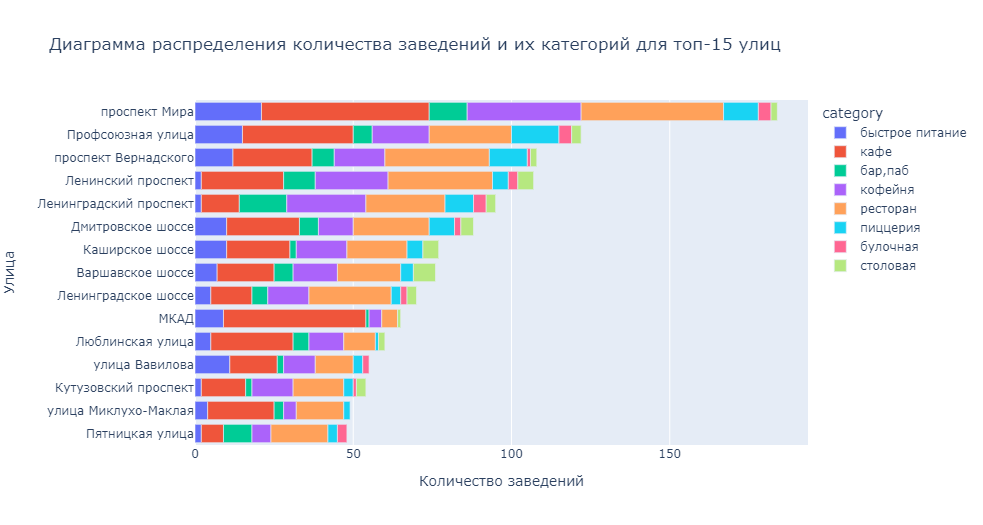

Улица с самым большим количеством заведений - проспект Мира. На ней находятся 184 заведения общественного питания.

### Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [190]:
# найдём улицы, на которых находится только одно заведение
streets_with_one_name = data.groupby('street',as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
streets_with_one_name = streets_with_one_name[streets_with_one_name['count']==1]
streets_with_one_name.head()

,street,count
0,1-й Автозаводский проезд,1
1,1-й Балтийский переулок,1
2,1-й Варшавский проезд,1
3,1-й Вешняковский проезд,1
5,1-й Голутвинский переулок,1


In [191]:
# отобразим данные с тех улиц, где заведение только одно
data_with_streets_with_one_name = streets_with_one_name.merge(data, on='street')
data_with_streets_with_one_name.head()

,street,count,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7
0,1-й Автозаводский проезд,1,Чайхана Азия,кафе,"Москва, 1-й Автозаводский проезд, 5",Южный административный округ,"ежедневно, круглосуточно",55.704847,37.657065,4.2,средние,Средний счёт:190–350 ₽,270.0,NaN,1,20.0,True
1,1-й Балтийский переулок,1,Хуан Хэ,ресторан,"Москва, 1-й Балтийский переулок, 3/25",Северный административный округ,"ежедневно, 12:00–22:00",55.810418,37.518824,4.4,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,0,60.0,False
2,1-й Варшавский проезд,1,Колизей,кафе,"Москва, 1-й Варшавский проезд, 1Ас9",Южный административный округ,пн-чт 10:00–00:00; пт-вс 10:00–05:00,55.648674,37.627979,4.0,unknown,unknown,NaN,NaN,0,NaN,False
3,1-й Вешняковский проезд,1,Deli by Shell,кафе,"Москва, 1-й Вешняковский проезд, 15",Юго-Восточный административный округ,unknown,55.723152,37.794014,3.4,unknown,unknown,NaN,NaN,0,NaN,False
4,1-й Голутвинский переулок,1,Shelby,"бар,паб","Москва, 1-й Голутвинский переулок, 6",Центральный административный округ,пн-пт 09:00–20:00,55.739600,37.613494,4.1,средние,Средний счёт:500–800 ₽,650.0,NaN,0,22.0,False


In [192]:
# отобразим категории заведений, которые чаще всего располагаются на улицах с одним заведением
groupby_category_data_with_streets_with_one_name = (
    data_with_streets_with_one_name.groupby('category',as_index=False).agg({'name':'count'})
    .sort_values(by='name',ascending=False)
)
groupby_category_data_with_streets_with_one_name

,category,name
3,кафе,160
6,ресторан,93
4,кофейня,84
0,"бар,паб",39
7,столовая,36
2,быстрое питание,23
5,пиццерия,15
1,булочная,8


In [193]:
fig = px.bar(groupby_category_data_with_streets_with_one_name.sort_values(by='name',ascending=True),
             x='name',
             y='category',
             text='name',
             title='Категории заведений, которые чаще всего располагаются на улицах с одним заведением',
            )
fig.update_layout(xaxis_title='Количество заведений',
                   yaxis_title='Категория заведения')
fig.show()

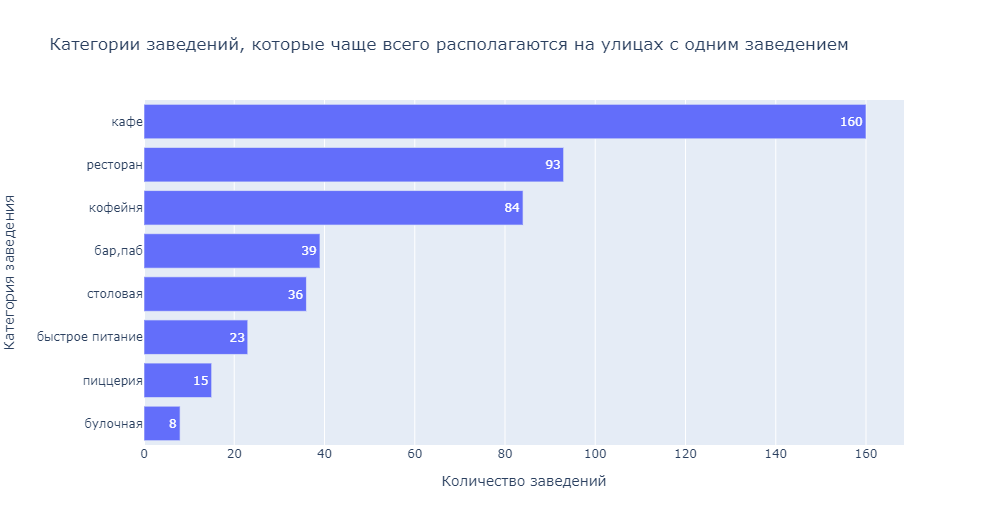

In [194]:
# узнаем, каких заведений больше: сетевых или несетевых на улицах с одним заведением
groupby_chain_data_with_streets_with_one_name = (
    data_with_streets_with_one_name.groupby('chain').agg({'name':'count'})
    .rename(index={0: 'не сеть', 1:'сеть'})
    .reset_index()
)
groupby_chain_data_with_streets_with_one_name

,chain,name
0,не сеть,325
1,сеть,133


In [195]:
fig = go.Figure(
    data=[go.Pie(
        labels=groupby_chain_data_with_streets_with_one_name ['chain'],
        values=groupby_chain_data_with_streets_with_one_name ['name'],
        title = 'Соотношение сетевых и несетевых заведений среди улиц с одним заведением'
    )]
)

fig.show()

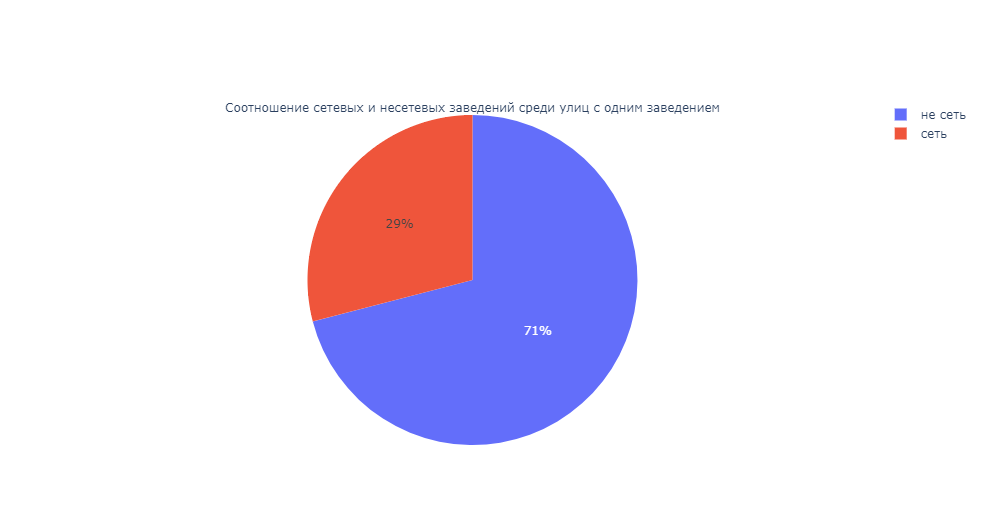

Видим, что на улицах с одним заведением чаще всего встречаются категории "кафе" и несетевые заведения.

### Найдите медианый средний чек для каждого района.
**Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?**

In [196]:
# отобразим медианный средний чек для каждого района
data_with_middle_avg_bill = (data
                             .groupby('district',as_index=False).agg({'middle_avg_bill':'median'})
                             .sort_values(by='middle_avg_bill',ascending=False)
                            )
data_with_middle_avg_bill

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


In [197]:
fig = px.bar(data_with_middle_avg_bill.sort_values(by='middle_avg_bill',ascending=True),
             x='middle_avg_bill',
             y='district',
             text='middle_avg_bill',
             title='Медианный средний чек по округам Москвы',
            )
fig.update_layout(xaxis_title='Медианный средний чек',
                   yaxis_title='Административный округ Москвы')
fig.show()

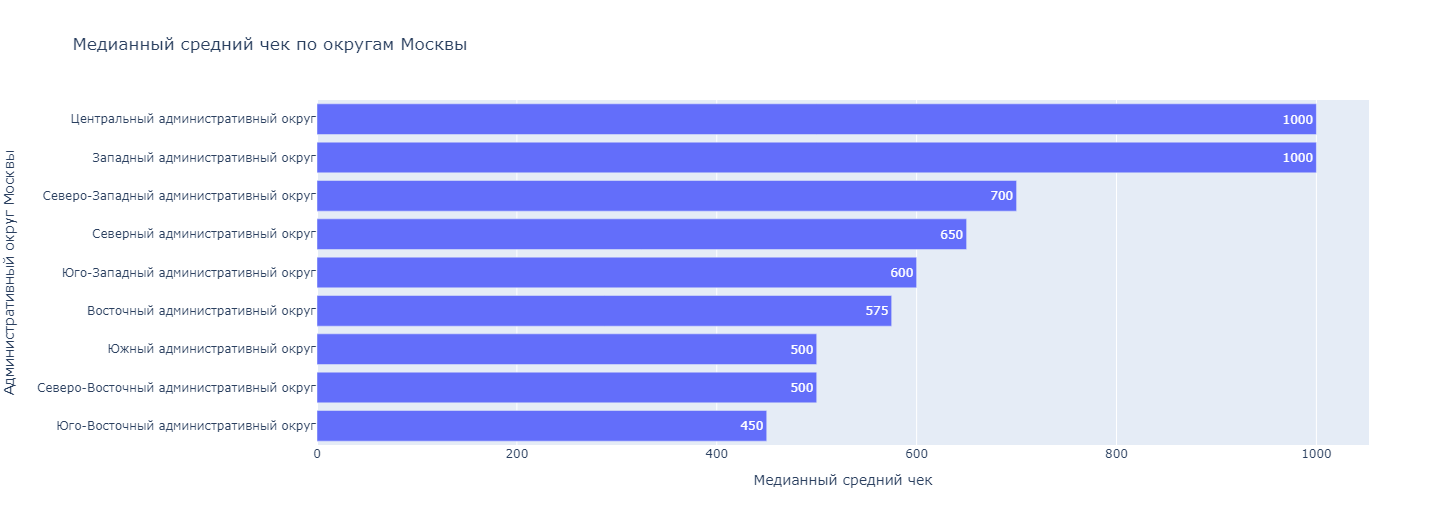

Округа с самым высоким медианным средним чеком - Центральный административный округ и Западный административный округ (по 1000 рублей).  
Округа с самым низким медианным средним чеком - Юго-Восточный административный округ (450 рублей), Южный административный округ, Северо-Восточный административный округ (по 500 рублей).  
Можем сделать вывод, что чем дальше от Центрального административного округа, тем медианный средний чек ниже. Но есть исключение - Западный административный округ, средний чек в нём такой же, как и в Центральном административном округе.

### Вывод к шагу 3
- Три самых популярных категории заведений общественного питания в Москве - это кафе, ресторан и кофейня.  
- Категории заведений с самым большим медианным количеством мест: рестораны; бары,пабы; кофейни.  
- Несетевых заведений в Москве больше, чем сетевых. В процентном отношении несетевых заведений - 61.9%, сетевых - 38.1%.  
- Чаще всего сетевыми являются булочные, доля сетевых заведений булочных к общему числу булочных, составляет 61.33%.
- "Шоколадница" - самое популярное сетевое заведение в Москве.  
- Категория заведений, которая чаще всего встречается среди топ-15 самых популярных сетевых заведений - кофейня.  
- Наибольшее количество заведений общественного питания находится в Центральном административном округе Москвы.  
- Самую высокую среднюю оценку имеет категория "бар,паб" - 4.39, самую низкую среднюю оценку имеет категория "быстрое питание" - 4.05.  
- Средний рейтинг заведений среди административных округов наиболее высокий в Центральном административном округе: 4.38, наиболее низкий - в Юго-Восточном административном округе: 4.10.    
- Улица с самым большим количеством заведений общественного питания - проспект Мира. На ней находятся 184 заведения.  
- Рассмотрев улицы, на которых есть только одно заведение общественного питания, можно сделать вывод, что самыми популярными категориями заведений, как и для всего датафрейма, являются кафе, рестораны и кофейни. Несетевых заведений на таких улицах больше (71%), чем сетевых (29%). Как видим, доля несетевых заведений на улицах с одним заведением общественного питания составляет 71%, что больше, чем доля несетевых заведений в общих данных по всем заведениям (61.9%).  
- Самый высокий средний чек имеют заведения в Западном и Центральном административных округах - 1000 рублей. Самый низкий средний чек имеют заведения Юго-Восточного административного округа - 450 рублей, а также Южного и Северо-Восточного административных округов - 500 рублей.  

## Детализируем исследование: открытие кофейни

### Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [198]:
# отфильтруем датасет data и оставим данные только по кофейням
coffee_house = data[data['category']=="кофейня"]
coffee_house.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,unknown,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
25,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,unknown,unknown,NaN,NaN,1,NaN,парк Левобережный,False
45,9 Bar Coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,unknown,unknown,NaN,NaN,1,46.0,Коровинское шоссе,False
46,CofeFest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,unknown,unknown,NaN,NaN,1,NaN,улица Маршала Федоренко,False
52,Cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,unknown,unknown,NaN,NaN,1,NaN,улица Дыбенко,False


In [199]:
f'Всего в датасете {len(coffee_house)} кофеен.'

'Всего в датасете 1413 кофеен.'

Сгруппируем данные по округам и отобразим количество кофеен в каждом административном округе

In [200]:
count_of_coffee_house = (
    coffee_house
    .groupby('district').agg({'name':'count'})
    .sort_values(by='name', ascending=False)
    .reset_index()
)
count_of_coffee_house

,district,name
0,Центральный административный округ,428
1,Северный административный округ,193
2,Северо-Восточный административный округ,159
3,Западный административный округ,150
4,Южный административный округ,131
5,Восточный административный округ,105
6,Юго-Западный административный округ,96
7,Юго-Восточный административный округ,89
8,Северо-Западный административный округ,62


In [201]:
# строим столбчатую диаграмму
fig = px.bar(count_of_coffee_house.sort_values(by='name', ascending=True), # загружаем данные и заново их сортируем
             x='name', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='name' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Количество кофеен в округах Москвы',
                   xaxis_title='Количетво кофеен',
                   yaxis_title='Административный округ')

fig.show() # выводим график

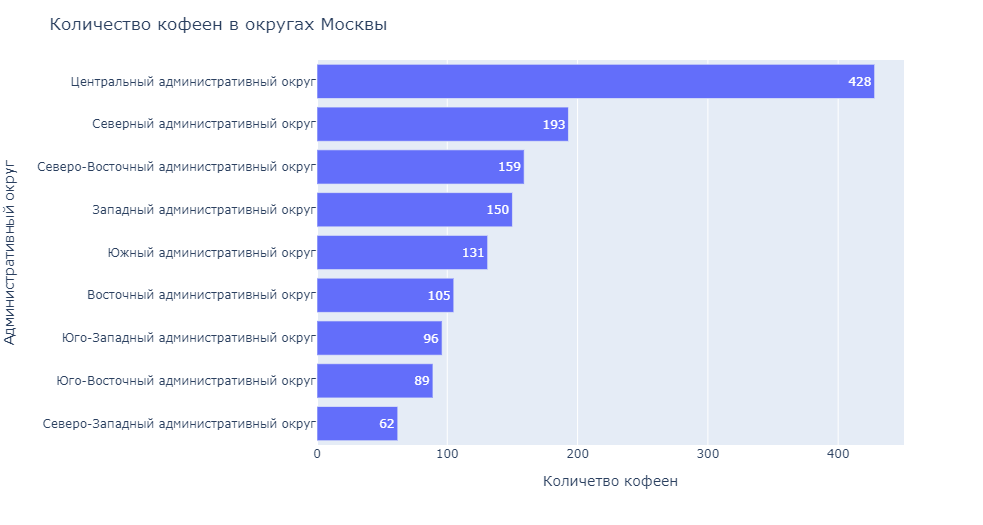

In [202]:
f'{count_of_coffee_house.loc[0,"district"]} имеет больше всего кофеен: \
{count_of_coffee_house.loc[0,"name"]} заведений'

'Центральный административный округ имеет больше всего кофеен: 428 заведений'

### Есть ли круглосуточные кофейни?

In [203]:
# отфильтруем данные по кофейням, которые работают ежедневно и круглосуточно
round_the_clock_coffee_house = coffee_house[coffee_house['is_24/7']==True]
round_the_clock_coffee_house.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
200,Wild Bean,кофейня,"Москва, Дмитровское шоссе, 107Е",Северный административный округ,"ежедневно, круглосуточно",55.878477,37.543426,3.5,unknown,unknown,NaN,NaN,1,20.0,Дмитровское шоссе,True
971,Wild Bean Cafe,кофейня,"Москва, Ярославское шоссе, 116",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.867822,37.708853,4.0,unknown,unknown,NaN,NaN,1,25.0,Ярославское шоссе,True
1047,Wild Bean Cafe,кофейня,"Москва, Ярославское шоссе, вл3с3",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.851778,37.676423,4.5,unknown,Цена чашки капучино:140–200 ₽,NaN,170.0,1,NaN,Ярославское шоссе,True
1214,Wild Bean Cafe,кофейня,"Москва, МКАД, 65-й километр, 8",Северо-Западный административный округ,"ежедневно, круглосуточно",55.813787,37.390701,4.3,unknown,unknown,NaN,NaN,1,NaN,МКАД,True
1291,Шоколадница,кофейня,"Москва, улица Народного Ополчения, 49, корп. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",55.794815,37.494834,4.2,средние,Средний счёт:650–850 ₽,750.0,NaN,1,200.0,улица Народного Ополчения,True


In [204]:
f'В Москве есть {len(round_the_clock_coffee_house)} кофеен, которые работают круглосуточно.'

'В Москве есть 59 кофеен, которые работают круглосуточно.'

### Какие у кофеен рейтинги? Как они распределяются по районам?

In [205]:
f'Средний рейтинг у кофеен: {coffee_house["rating"].mean().round(2)}'

'Средний рейтинг у кофеен: 4.28'

In [206]:
# посчитаем средние рейтинги кофеен по районам Москвы
mean_rating_by_district_for_coffee_house = (
    coffee_house
    .groupby('district').agg({'rating':'mean'})
    .round(2)
    .sort_values(by='rating',ascending=False)
    .reset_index()
)
mean_rating_by_district_for_coffee_house

,district,rating
0,Центральный административный округ,4.34
1,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
3,Восточный административный округ,4.28
4,Юго-Западный административный округ,4.28
5,Юго-Восточный административный округ,4.23
6,Южный административный округ,4.23
7,Северо-Восточный административный округ,4.22
8,Западный административный округ,4.20


In [207]:
# строим столбчатую диаграмму
fig = px.bar(mean_rating_by_district_for_coffee_house.sort_values(by='rating', ascending=True), # загружаем данные и заново их сортируем
             x='rating', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='rating' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Средние рейтинги кофеен по округам Москвы',
                   xaxis_title='Средний рейтинг кофеен в административном округе',
                   yaxis_title='Административный округ')

fig.show() # выводим график

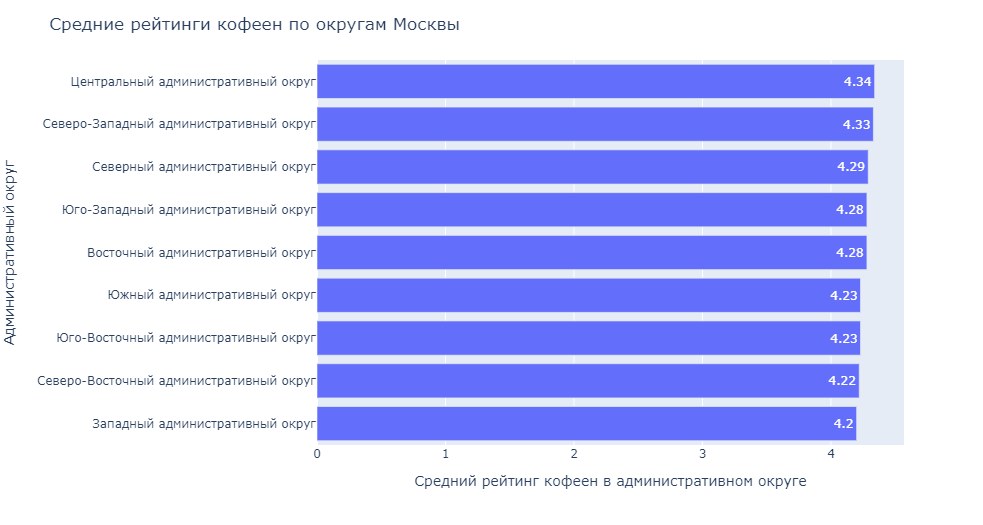

Самый высокий средний рейтинг у кофеен в Центральном административном округе: 4.34, самый низкий средний рейтинг - в Западном административном округе: 4.2.

### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [208]:
# Рассмотрим данные столбца 'middle_coffee_cup' для кофеен
coffee_house['middle_coffee_cup'].describe().round(2)

count     521.00
mean      175.06
std        89.75
min        60.00
25%       124.00
50%       170.00
75%       225.00
max      1568.00
Name: middle_coffee_cup, dtype: float64

Чашка капучино в кофейнях Москвы в среднем обходится в 175.06 рулбей, медианное значение - 170 рублей.

In [209]:
fig = px.box(coffee_house, x="district", y="middle_coffee_cup", color="district")
# оформляем график
fig.update_layout(title='Диаграмма "Ящик с усами" для цены одной чашки капучино по округам Москвы',
                   xaxis_title='Административный округ',
                   yaxis_title='Цена одной чашки капучино')
fig.update_yaxes(range=[0, 400])
fig.show()

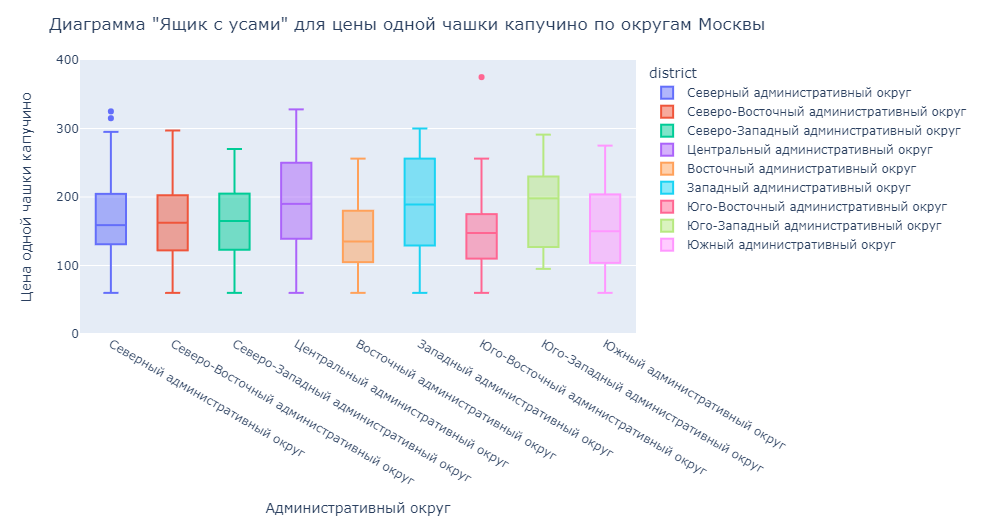

Видим, что в данных для оценки одной чашки капучино присутствуют выбросы, поэтому для оценки стоимости чашек капучино по районам будем использовать медианный показатель цены.

In [210]:
# Найдём медианную цену одной чашки капучино для округов Москвы
median_middle_coffee_cup_by_district = (
    coffee_house.groupby('district').agg({'middle_coffee_cup':'median'})
    .sort_values(by='middle_coffee_cup',ascending=False)
    .reset_index()
)
median_middle_coffee_cup_by_district

,district,middle_coffee_cup
0,Юго-Западный административный округ,198.0
1,Центральный административный округ,190.0
2,Западный административный округ,189.0
3,Северо-Западный административный округ,165.0
4,Северо-Восточный административный округ,162.5
5,Северный административный округ,159.0
6,Южный административный округ,150.0
7,Юго-Восточный административный округ,147.5
8,Восточный административный округ,135.0


In [211]:
# строим столбчатую диаграмму
fig = px.bar(median_middle_coffee_cup_by_district.sort_values(by='middle_coffee_cup', ascending=True), # загружаем данные и
             #заново их сортируем
             x='middle_coffee_cup', # указываем столбец с данными для оси X
             y='district', # указываем столбец с данными для оси Y
             text='middle_coffee_cup' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве объявлений внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Медианная стоимость одной чашки капучино по округам Москвы',
                   xaxis_title='Медианная стоимость одной чашки капучино',
                   yaxis_title='Административный округ')

fig.show() # выводим график

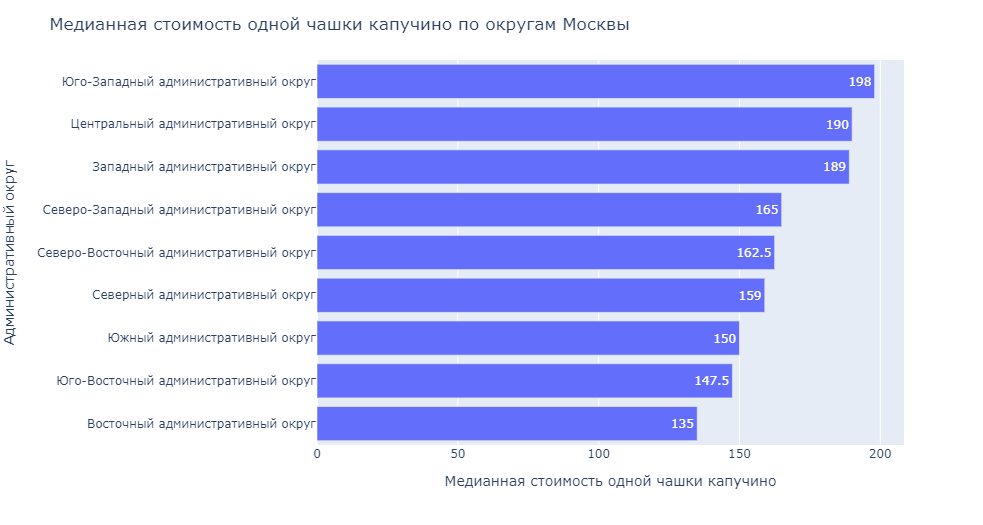

Видим, что самая высокая медианная стоимость чашки капучино - в Юго-Западном административном округе (198 рублей), затем идёт Центральный административный округ (190 рублей), далее - Западный административный округ(189 рублей).  
Самая низкая медианная стоимость чашки капучино - в Восточном административном округе (135 рублей).

Медианная стоимость чашки капучино в кофейнях Москвы - 170 рублей. Однако данный показатель в зависимости от округа отличается от цены в 170 рублей.   
При открытии заведения новой кофейни стоит ориентироваться на цену чашки капучино исходя из её медианной цены в определённом округе Москвы.

### Рекомендации для открытия нового заведения

По итогам исследования можно сделать рекомендацию по открытию кофейни в Западном административном округе. В данном округе медианная стоимость чашки капучино одна из самых высоких среди кофеен Москвы (189 рублей), а средний рейтинг среди кофеен - самый низкий (4.2).

### Вывод к шагу 4  
- В датасете находится 1413 кофеен. Больше всего кофеен в Центральном административном округе - 428 заведений.  
- В Москве есть 59 кофеен, которые работают ежедневно и круглосуточно.  
- Самый высокий средний рейтинг у кофеен по округам - в Центральном административном округе (4.34), самый низкий средний рейтинг у кофеен - в Западном административном округе (4.2).  
- Медианная стоимость чашки капучино в кофейнях Москвы - 170 рублей. Однако данный показатель в зависимости от округа отличается от данной цены. При открытии заведения новой кофейни стоит ориентироваться на цену чашки капучино исходя из её медианной цены в определённом округе Москвы.
- По итогам исследования можно сделать рекомендацию по открытию кофейни в Западном административном округе. В данном округе медианная стоимость чашки капучино одна из самых высоких среди кофеен Москвы (189 рублей), а средний рейтинг среди кофеен - самый низкий (4.2).

## Общий вывод

В проекте нам были предоставлены данные с заведениями общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Заказчики в лице инвесторов из фонда «Shut Up and Take My Money» просили подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.  

На первом шаге сохранили данные о заведениях в датафрейм data. Датафрейм состоит из 8406 строк и 14 столбцов.  

На втором шаге:  
- Выяснили, что явных дубликатов в датафрейме нет. Явных дубликатов одновременно по столбцам 'name' и 'address' также нет.
-  В столбцах с категориальными значениями ('hours', 'price', 'avg_bill') заменили пропуски на значение-заглушку 'unknown'. Пропуски в столбцах с количественными значениями не заполняли.  
- Удалили неявные дубликаты из столбца 'name'.  
-  Создали столбец 'street' с названиями улиц из столбца с адресом и столбец 'is_24/7' с обозначением, что заведение работает ежедневно и круглосуточно.  

На третьем шаге выяснили следующее:  
- Три самых популярных категории заведений общественного питания в Москве - это кафе, ресторан и кофейня.  
- Категории заведений с самым большим медианным количеством мест: рестораны; бары,пабы; кофейни.  
- Несетевых заведений в Москве больше, чем сетевых. В процентном отношении несетевых заведений - 61.9%, сетевых - 38.1%.  
- Чаще всего сетевыми являются булочные, доля сетевых заведений булочных к общему числу булочных, составляет 61.33%.    
- "Шоколадница" - самое популярное сетевое заведение в Москве.  
- Категория заведений, которая чаще всего встречается среди топ-15 самых популярных сетевых заведений - кофейня.
- Наибольшее количество заведений общественного питания находится в Центральном административном округе Москвы.  
- Самую высокую среднюю оценку имеет категория "бар,паб" - 4.39, самую низкую среднюю оценку имеет категория "быстрое питание" - 4.05.  
- Средний рейтинг заведений среди административных округов наиболее высокий в Центральном административном округе: 4.38, наиболее низкий - в Юго-Восточном административном округе: 4.10.    
- Улица с самым большим количеством заведений общественного питания - проспект Мира. На ней находятся 184 заведения.  
- Рассмотрев улицы, на которых есть только одно заведение общественного питания, можно сделать вывод, что самыми популярными категориями заведений, как и для всего датафрейма, являются кафе, рестораны и кофейни. Несетевых заведений на таких улицах больше (71%), чем сетевых (29%). Как видим, доля несетевых заведений на улицах с одним заведением общественного питания составляет 71%, что больше, чем доля несетевых заведений в общих данных по всем заведениям (61.9%).  
- Самый высокий средний чек имеют заведения в Западном и Центральном административных округах - 1000 рублей. Самый низкий средний чек имеют заведения Юго-Восточного административного округа - 450 рублей, а также Южного и Северо-Восточного административных округов - 500 рублей.  

На четвёртом шаге выяснили следующее:  
- В датасете находится 1413 кофеен. Больше всего кофеен в Центральном административном округе - 428 заведений.  
- В Москве есть 59 кофеен, которые работают ежедневно и круглосуточно.  
- Самый высокий средний рейтинг у кофеен по округам - в Центральном административном округе (4.34), самый низкий средний рейтинг у кофеен - в Западном административном округе (4.2).  
- Медианная стоимость чашки капучино в кофейнях Москвы - 170 рублей. Однако данный показатель в зависимости от округа отличается от данной цены. При открытии заведения новой кофейни стоит ориентироваться на цену чашки капучино исходя из её медианной цены в определённом округе Москвы.  
- По итогам исследования можно сделать рекомендацию по открытию кофейни в Западном административном округе. В данном округе медианная стоимость чашки капучино одна из самых высоких среди кофеен Москвы (189 рублей), а средний рейтинг среди кофеен - самый низкий (4.2).  


Презентация: https://disk.yandex.ru/i/DjRbsKdOl9S0GA